## Import Library

In [ ]:
import numpy as np  # digunakan untuk memproses data berbentuk numerik
import pandas as pd   # berguna untuk memanipulasi dataset
import matplotlib.pyplot as plt   # untuk menampilkan visualisasi dari dataset
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split    # digunakan untuk membagi dataset menjadi data train dan test
from sklearn.preprocessing import StandardScaler    # digunakan untuk menyamakan skala dari data-data fitur
from sklearn.neighbors import KNeighborsRegressor    # digunakan untuk membuat model KNN
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score    # digunakan untuk mengevaluasi model

## Inisialisasi / Tahap awal


### Mengimport dataset

In [ ]:
# mengimport dataset dari komputer ke Colab
from google.colab import files
dataset = files.upload()

Saving cereal.csv to cereal.csv


In [ ]:
# membaca dataset berbentuk .csv
df = pd.read_csv('cereal.csv')

## Visualisasi data

### Menampilkan Data

In [ ]:
# Menyajikan data ke dalam tabel sederhana
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [ ]:
# menampilkan overview dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


### Menampilkan data ke dalam bentuk grafik

Plot

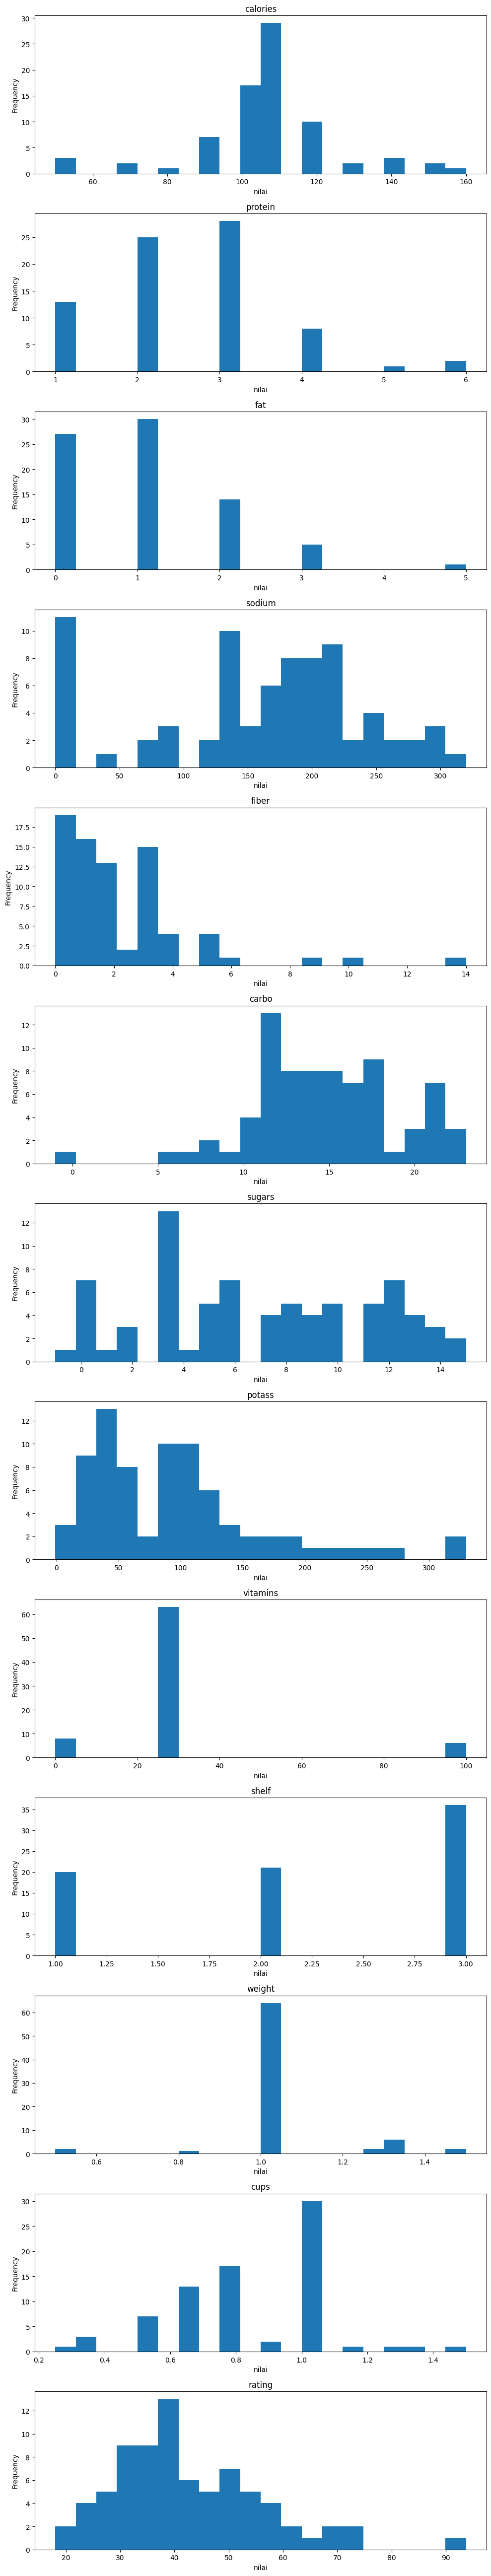

In [ ]:
import matplotlib.pyplot as plt
# Select numerical columns
numerical_cols = df.select_dtypes(include=['float', 'int']).columns

# Create subplots
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(10, 4*len(numerical_cols)))

# Iterate over numerical columns and create histograms
for i, col in enumerate(numerical_cols):
  axes[i].hist(df[col], bins=20)
  axes[i].set_title(col)
  axes[i].set_xlabel('nilai')
  axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## Mengimplementasikan KNN

Memilih fitur

In [ ]:
# menentukan fitur
X = df[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'weight', 'cups']]
y = df['rating'] # Target variable: rating (continuous)

Membagi data train dan test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)   # test size adalah persentase dari jumlah data yang akan digunakan untuk evaluasi model

Menerapkan feature scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Implementasi KNN

In [ ]:
knn = KNeighborsRegressor(n_neighbors = 5, metric = 'minkowski', p = 2)    # standar yang akan kita berikan adalah 5
knn.fit(X_train, y_train)

KNeighborsRegressor()

Melakukan prediksi

In [ ]:
y_pred = knn.predict(X_test)

## Tahap Evaluasi

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")   # semakin kecil nilai ini semakin baik modelnya, nilai idealnya adalah 0.0
print(f"Mean Absolute Error: {mae}")   # semakin kecil nilai ini semakin baik modelnya, nilai idealnya adalah 0.0
print(f"R² Score: {r2}")   # semakin besar nilai ini semakin baik modelnya, nilai idealnya adalah 1.0

Mean Squared Error: 26.77986718351418
Mean Absolute Error: 4.080899033333334
R² Score: 0.8361027344499734


## Export

In [ ]:
import joblib

# Save the trained model
joblib.dump(knn, 'knn_regression_model.pkl')

# Save the scaler used for data preprocessing
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']